In [ ]:
import tensorflow_io as tfio
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib
from matplotlib import pyplot as plt
import os
import pathlib
from pathlib import Path
import numpy as np
from IPython.display import display
from IPython.display import Audio
from IPython.core.display import display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, Dropout, BatchNormalization, Reshape, Input, Dense

/var/folders/0v/782rm2_x0hq9kjgtr625w7cc0000gn/T/ipykernel_3616/2372750846.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display


In [2]:
import gc
import tensorflow as tf

gc.collect()  # Garbage collection
tf.keras.backend.clear_session()  # Clear TensorFlow session

In [3]:
path='/Users/hotpolarbear/Documents/Programs/Projects/Voice Automation/Voice-Command-Automation-Tensorflow-Arduino/Dataset'
data_dir = Path(path)
commands = np.array(os.listdir(str(data_dir)))
print("COMMANDS :", commands)

COMMANDS : ['eight' 'nine' 'three' 'one' 'zero' 'seven' 'two' 'six' 'five' 'four']


In [4]:
import splitfolders
splitfolders.ratio(path, output="Split-Dataset",seed=1, ratio=(.8, 0.1,0.1)) 

In [5]:
test_path='/Users/hotpolarbear/Documents/Programs/Projects/Voice Automation/Voice-Command-Automation-Tensorflow-Arduino/Split-Dataset/test'
train_path='/Users/hotpolarbear/Documents/Programs/Projects/Voice Automation/Voice-Command-Automation-Tensorflow-Arduino/Split-Dataset/train'
val_path='/Users/hotpolarbear/Documents/Programs/Projects/Voice Automation/Voice-Command-Automation-Tensorflow-Arduino/Split-Dataset/val'

In [6]:
def mono_16k(wav, labels):
    #file_contents = tf.io.read_file(file_path)
    #wav ,sample_rate = tf.audio.decode_wav(file_contents, desired_channels = 1)
    wav = tf.squeeze(wav, axis = -1)
    #sample_rate = tf.cast(sample_rate, dtype= tf.int64)
    #wav = tfio.audio.resample(wav, rate_in = sample_rate, rate_out = 16000)
    return wav, labels

In [7]:
train_data = tf.keras.utils.audio_dataset_from_directory(
    directory  = train_path,
    labels='inferred',
    class_names=None,
    batch_size = 64,
    output_sequence_length = 16000
)
val_data=tf.keras.utils.audio_dataset_from_directory(
    directory = val_path,
    labels='inferred',
    class_names=None,
    batch_size=64,
    output_sequence_length = 16000
)

Found 18928 files belonging to 10 classes.
Found 2362 files belonging to 10 classes.


In [8]:
labels_list = np.array(train_data.class_names)
labels_list

array(['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'three',
       'two', 'zero'], dtype='<U5')

In [9]:
train_data=train_data.repeat()
val_data=val_data.repeat()

In [10]:
train_data = train_data.map(mono_16k, tf.data.AUTOTUNE)
val_data = val_data.map(mono_16k, tf.data.AUTOTUNE)

In [11]:
for x_audio, x_label in train_data.take(1):
    print(x_audio.shape)
    print(x_label.shape)

(64, 16000)
(64,)


2025-03-11 03:09:25.267120: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


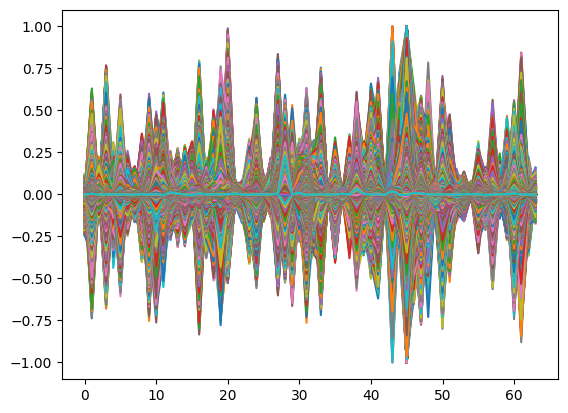

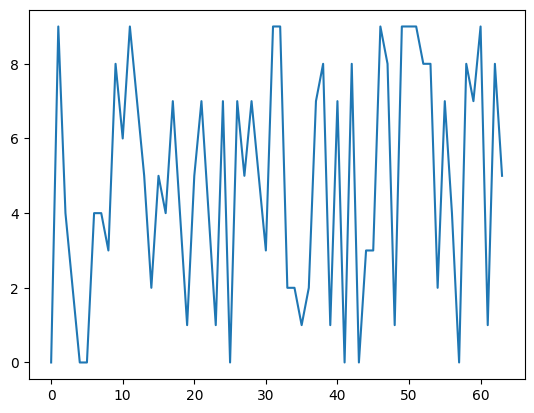

In [12]:
waves = train_data.as_numpy_iterator().next()
for wave in waves:
    
    plt.plot(wave)
    plt.show()

In [ ]:
import tensorflow as tf

def make_spectrogram(wav, sample_rate=16000):
    # Compute STFT
    stft = tf.signal.stft(wav, frame_length=512, frame_step=256, fft_length=512)
    spectrogram = tf.abs(stft)  # Convert to magnitude

    num_mel_bins = 128
    num_spectrogram_bins = tf.shape(spectrogram)[-1]  # Dynamically get spectrogram size

    # Compute Mel filterbank
    mel_filterbank = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins=num_mel_bins,
        num_spectrogram_bins=num_spectrogram_bins,
        sample_rate=sample_rate,
        lower_edge_hertz=80.0,
        upper_edge_hertz=7600.0
    )

    # Apply Mel filter
    mel_spectrogram = tf.tensordot(spectrogram, tf.cast(mel_filterbank, dtype=tf.float32), axes=(-1, 0))

    mel_spectrogram = tf.expand_dims(mel_spectrogram, axis=-1)  # Shape: (Time, Freq, 1)

    # Resize to (128, 128, 1)
    mel_spectrogram = tf.image.resize(mel_spectrogram, (128, 128))

    return mel_spectrogram

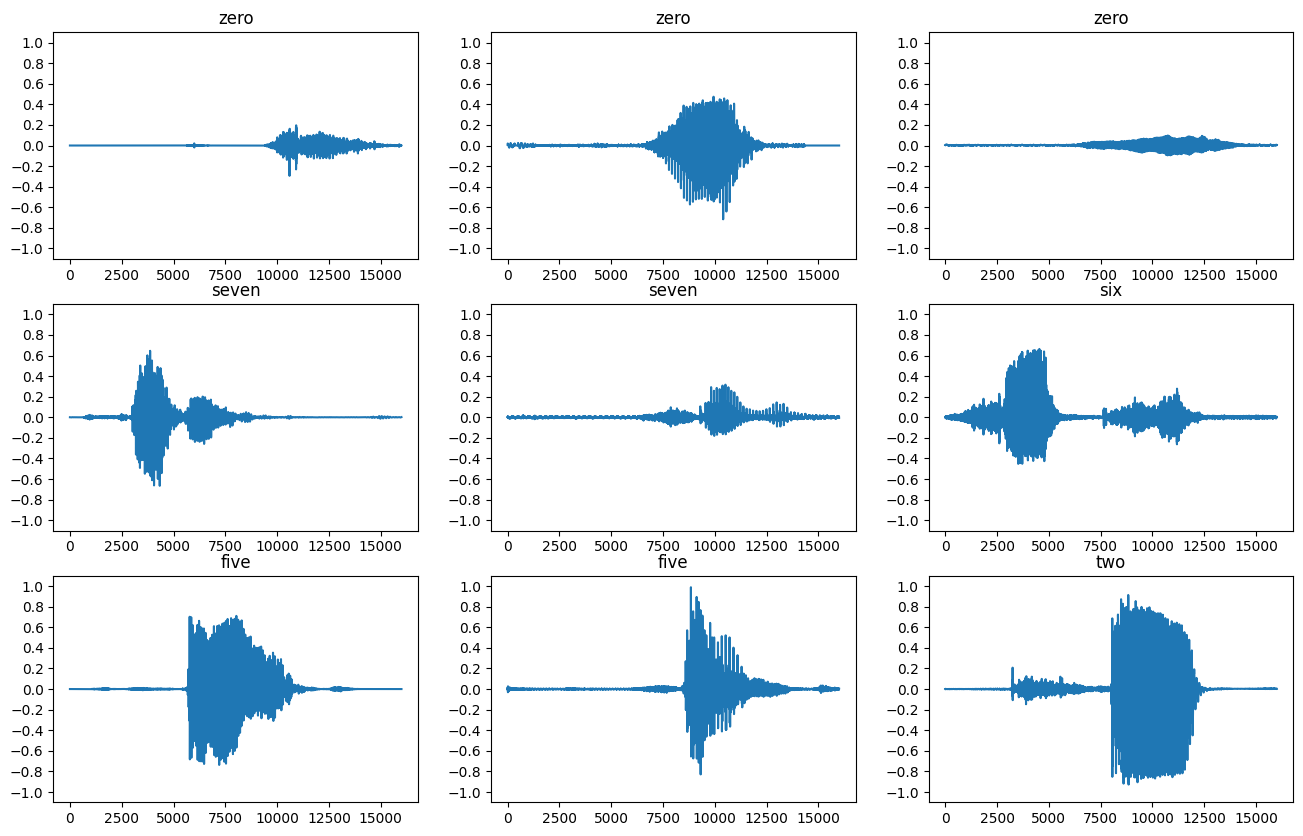

In [14]:
plt.figure(figsize=(16, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
  plt.subplot(rows, cols, i+1)
  audio_signal = x_audio[i]
  plt.plot(audio_signal)
  plt.title(labels_list[x_label[i]])
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.ylim([-1.1, 1.1])

In [ ]:
for i in range(6):
    label = labels_list[x_label[i]]  # Ensure correct indexing
    waveform = x_audio[i]

    waveform = tf.convert_to_tensor(waveform, dtype=tf.float32)
    waveform = tf.squeeze(waveform)  # Remove extra dimensions if needed

    spectrogram = make_spectrogram(waveform)

    print('Label:', label)
    print('Waveform shape:', waveform.shape)  # Should be (samples,)
    print('Spectrogram shape:', spectrogram.shape)  # Should be (128, 128, 1)

    # Play audio
    display(Audio(waveform.numpy(), rate=16000))  # Convert to NumPy for playback

Label: zero
Waveform shape: (16000,)
Spectrogram shape: (128, 128, 1)


Label: zero
Waveform shape: (16000,)
Spectrogram shape: (128, 128, 1)


Label: zero
Waveform shape: (16000,)
Spectrogram shape: (128, 128, 1)


Label: seven
Waveform shape: (16000,)
Spectrogram shape: (128, 128, 1)


Label: seven
Waveform shape: (16000,)
Spectrogram shape: (128, 128, 1)


Label: six
Waveform shape: (16000,)
Spectrogram shape: (128, 128, 1)


In [16]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram)
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

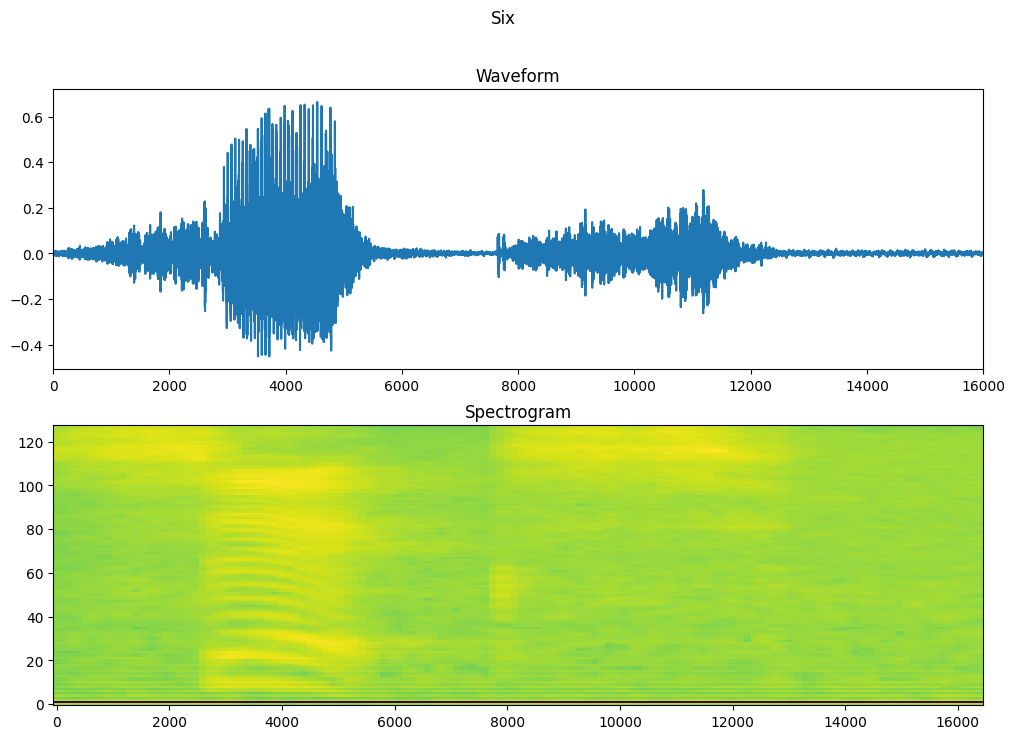

In [17]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()

In [18]:
'''def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (make_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)'''
  
val_dataset = val_data.map(lambda x, y: (make_spectrogram(x), y))
train_dataset = train_data.map(lambda x, y: (make_spectrogram(x), y))
num_parallel_calls=tf.data.AUTOTUNE
'''
train_spectrogram_ds = make_spec_ds(train_data)
test_spectrogram_ds = make_spec_ds(test_data)'''

'\ntrain_spectrogram_ds = make_spec_ds(train_data)\ntest_spectrogram_ds = make_spec_ds(test_data)'

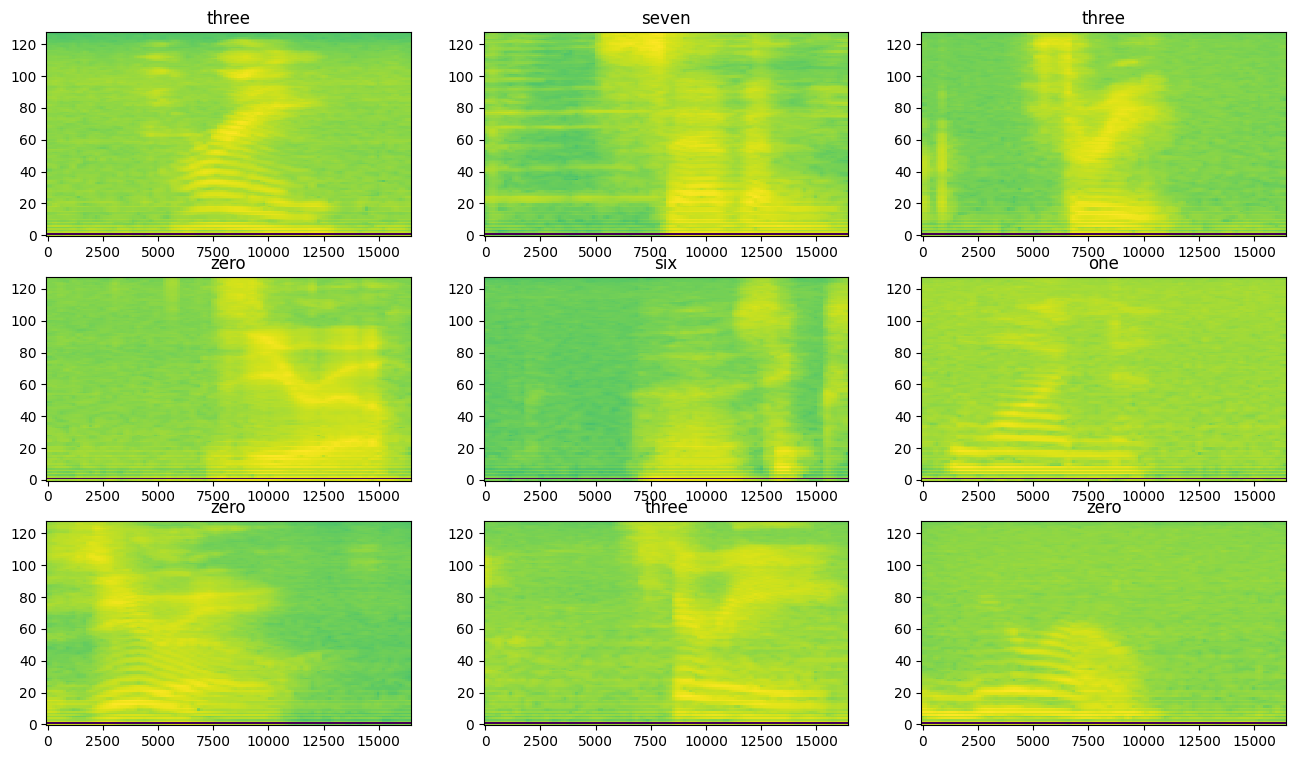

In [19]:
for example_spectrograms, example_spect_labels in train_dataset.take(1):
  break
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(labels_list[example_spect_labels[i].numpy()])

plt.show()

In [20]:
print("Expected Input Shape:", example_spectrograms.shape[1:])

Expected Input Shape: (128, 128, 1)


In [21]:
model = tf.keras.models.Sequential([
    Input(shape=(128, 128,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation ="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,481,162 (5.65 MB)

 Trainable params: 1,481,162 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_dataset,        
    epochs=10,
    steps_per_epoch=100,
    validation_data=val_dataset,  
    validation_steps=50   
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.4541 - loss: 1.6989 - val_accuracy: 0.7774 - val_loss: 0.7909
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.7927 - loss: 0.6896 - val_accuracy: 0.8741 - val_loss: 0.4167
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8802 - loss: 0.4178 - val_accuracy: 0.8870 - val_loss: 0.3755
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.8981 - loss: 0.3262 - val_accuracy: 0.9158 - val_loss: 0.2876
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9199 - loss: 0.2640 - val_accuracy: 0.9205 - val_loss: 0.2617
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9364 - loss: 0.2190 - val_accuracy: 0.9324 - val_loss: 0.2386
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9453 - loss: 0.1858 - val_accuracy: 0.9380 - val_loss: 0.2218
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9457 - loss: 0.1828 - val_accu

In [26]:
test_data = tf.keras.utils.audio_dataset_from_directory(
    directory  = test_path,
    labels='inferred',
    class_names=None,
    batch_size = 64,
    output_sequence_length = 16000
)

Found 2376 files belonging to 10 classes.


In [28]:
model.save('VCA_6M_9336.keras')